# Mapping a Country's Roads

For this exercise we shall first import the shapefile of roads on a continental level and plot them according to ther road type. Next we will import the country borders shapefile and extract our desired country. Finally we shall make use of a spacial join to get only the roads within our desired country and plot these roads by road type and distance to the country's capital city.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shp

# Setting the plots' resolution
plt.rcParams['figure.dpi'] = 150

In [2]:
# Reading the latam roads shapefile.
zipfile = "GRIP4_Region2_vector_shp.zip"
df = gpd.read_file(zipfile)

In [5]:
df.head()

,GP_RTP,GP_REX,GP_RAV,GP_RRG,GP_RCY,GP_RSE,GP_RSI,GP_RSY,gp_gripreg,Shape_Leng,geometry
0,5,1,0,3,484,0,52,2010,2,0.001760,"LINESTRING (-92.94680 17.56511, -92.94674 17.5..."
1,5,1,0,3,484,0,52,2010,2,0.001206,"LINESTRING (-92.14933 14.68997, -92.14885 14.6..."
2,5,1,0,3,484,0,52,2010,2,0.002789,"LINESTRING (-92.14532 14.69100, -92.14574 14.6..."
3,5,1,0,3,484,0,52,2010,2,0.001974,"LINESTRING (-97.08967 15.87324, -97.08992 15.8..."
4,5,1,0,3,484,0,52,2010,2,0.000938,"LINESTRING (-93.76223 16.09438, -93.76227 16.0..."


In [6]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3083547 entries, 0 to 3083546
Data columns (total 11 columns):
 #   Column      Dtype   
---  ------      -----   
 0   GP_RTP      int64   
 1   GP_REX      int64   
 2   GP_RAV      int64   
 3   GP_RRG      int64   
 4   GP_RCY      int64   
 5   GP_RSE      int64   
 6   GP_RSI      int64   
 7   GP_RSY      int64   
 8   gp_gripreg  int64   
 9   Shape_Leng  float64 
 10  geometry    geometry
dtypes: float64(1), geometry(1), int64(9)
memory usage: 258.8 MB


(-121.36037075534996,
 -28.164022667649974,
 -59.443894815399965,
 37.106951123400044)

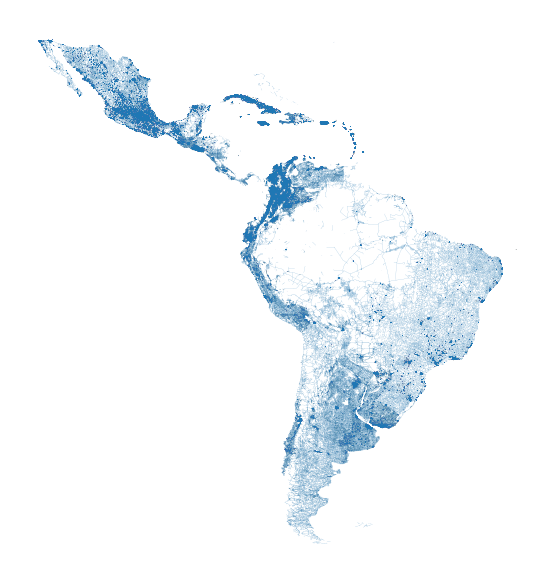

In [3]:
# Plotting the roads of Latam (May take a while to plot)

fig, ax = plt.subplots()
df.plot(ax=ax, lw=0.05)
ax.axis('off')

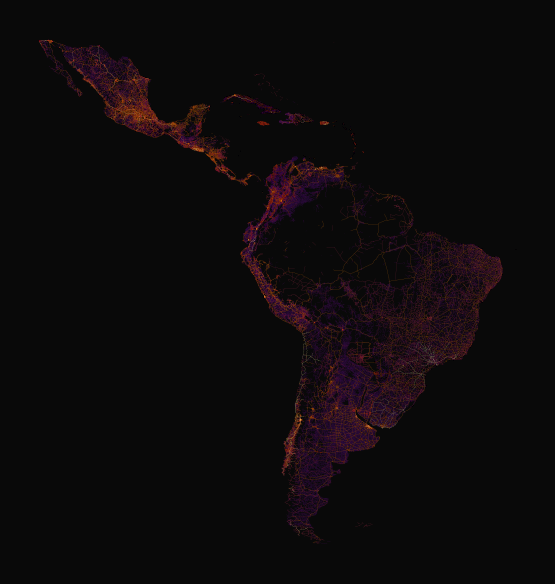

In [4]:
# Plotting the roads of Latam with different color according to the inferno_r colormap
# and the type of road according to the GP_RTP column.

fig, ax = plt.subplots(facecolor='#090909')
df.plot(ax=ax, column="GP_RTP", cmap="inferno_r", lw=0.05)
ax.axis('off')
#ax.set_xlim(-12.5, 30)
#ax.set_ylim(35, 73)
plt.show()

In [13]:
# Reading the countries shapefile.
zipfile2 = "ne_10m_admin_0_countries.zip"
gdf = gpd.read_file(zipfile2)

In [16]:
# Extracting the shape of our country of choice.
gt_df = gdf.loc[gdf['ADMIN'] == 'Guatemala']

In [17]:
gt_df

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
117,Admin-0 country,0,3,Guatemala,GTM,0,2,Sovereign country,1,Guatemala,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.36162 14.41548, -89.36182 14.415..."


In [18]:
# Spatial join to the latam roads geodataframe to get only the roads
# within the borders of our country of choice.
roads = gpd.sjoin(df, gt_df, op='within')

c:\ProgramData\Miniconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [20]:
# Optional: Saving the geodataframe to a shapefile.
#roads.to_file("gt_roads.shp")

c:\ProgramData\Miniconda3\envs\pythonmaps\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\esteb\AppData\Local\Temp\ipykernel_4256\1868055684.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  roads.to_file("gt_roads.shp")


In [ ]:
# Optional, reading the shapefile previously saved
#zipfile2 = "gt_roads.zip"
#roads = gpd.read_file(zipfile2)

(-92.40648799999994, -88.09101199999995, 13.535636000000025, 18.00722400000005)

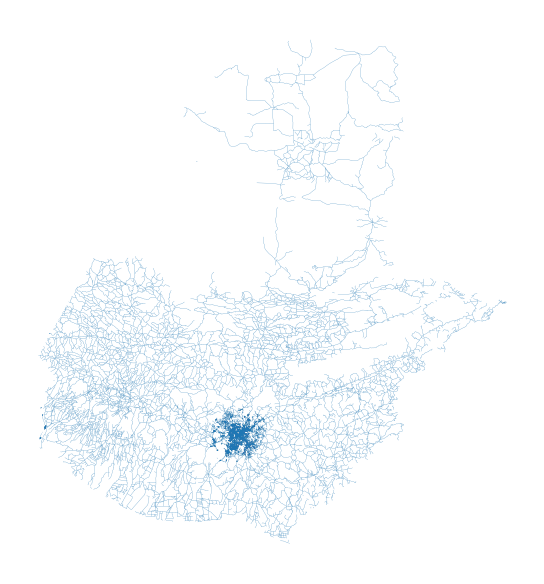

In [ ]:
# Plotting the roads inside our country of choice.
fig, ax = plt.subplots()
roads.plot(ax=ax, lw=0.1)
ax.axis('off')

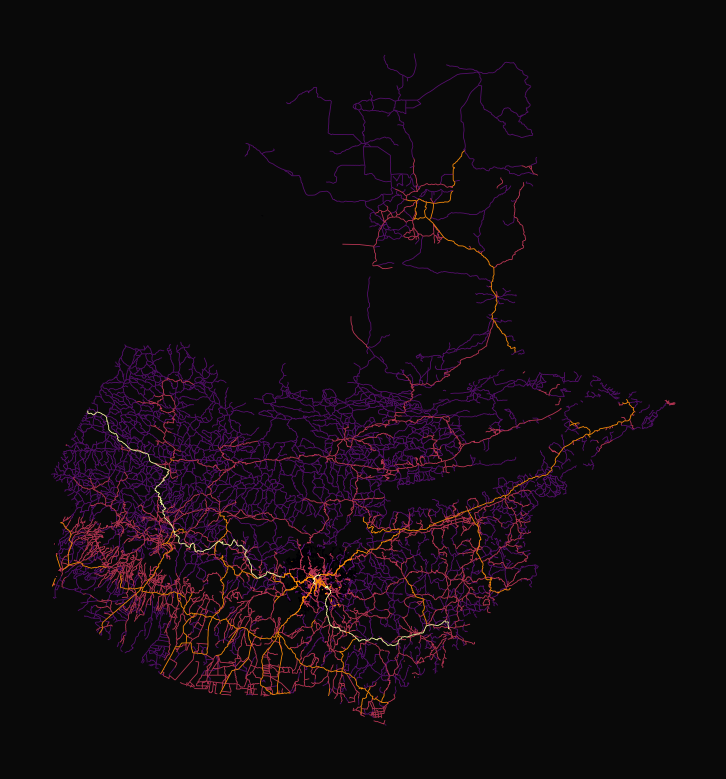

In [43]:
# Plotting the roads according to their road type.
fig, ax = plt.subplots(facecolor='#090909')
roads.plot(ax=ax, column="GP_RTP", cmap="inferno_r", lw=0.3)
ax.axis('off')
#ax.set_xlim(-12.5, 30)
#ax.set_ylim(35, 73)
plt.show()

In [6]:
# Creating a geodataframe with a single point: the location of the capital.

capital = gpd.GeoDataFrame({"geometry":[shp.geometry.Point(14.641794,-90.513283)]},
                           crs= "EPSG:4326")
capital

,geometry
0,POINT (14.64179 -90.51328)


In [7]:
#Calculating distance from roads to capital.

distances = roads.distance(capital.iloc[0].geometry)
roads["distance2capital"] = distances
roads

C:\Users\esteb\AppData\Local\Temp\ipykernel_352\1980311138.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = roads.distance(capital.iloc[0].geometry)


,GP_RTP,GP_REX,GP_RAV,GP_RRG,GP_RCY,GP_RSE,GP_RSI,GP_RSY,gp_gripreg,Shape_Leng,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,distance2capital
0,5,1,0,3,484,0,52,2010,2,0.001206,...,None,None,None,None,None,None,None,None,"LINESTRING (-92.14933 14.68997, -92.14885 14.6...",149.905910
1,5,1,0,3,484,0,52,2010,2,0.002789,...,None,None,None,None,None,None,None,None,"LINESTRING (-92.14532 14.69100, -92.14574 14.6...",149.904732
2,5,1,0,3,484,0,52,2010,2,0.001600,...,None,None,None,None,None,None,None,None,"LINESTRING (-92.14654 14.68966, -92.14752 14.6...",149.904662
3,5,1,0,3,484,0,52,2010,2,0.001626,...,None,None,None,None,None,None,None,None,"LINESTRING (-92.14649 14.69011, -92.14753 14.6...",149.904943
4,5,1,0,3,484,0,52,2010,2,0.001655,...,None,None,None,None,None,None,None,None,"LINESTRING (-92.14644 14.69052, -92.14674 14.6...",149.905191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54476,1,1,2,4,320,1,54,2014,2,0.001183,...,None,None,None,None,None,None,None,None,"LINESTRING (-90.46745 14.56541, -90.46816 14.5...",148.625320
54477,1,1,2,4,320,1,54,2014,2,0.000153,...,None,None,None,None,None,None,None,None,"LINESTRING (-90.55477 14.61650, -90.55479 14.6...",148.723195
54478,1,1,2,4,320,1,54,2014,2,0.000480,...,None,None,None,None,None,None,None,None,"LINESTRING (-90.55851 14.59934, -90.55898 14.5...",148.713708
54479,1,1,2,4,320,1,54,2014,2,0.000307,...,None,None,None,None,None,None,None,None,"LINESTRING (-90.55786 14.59873, -90.55774 14.5...",148.712538


In [30]:
# Calculating the linewidth according to the distance to the capital.

# For this, we use an exponential decay function.
roads["distance2capital_lw"] = 1 / np.exp(roads["distance2capital"])

leftSpan = np.amax(roads["distance2capital_lw"]) - np.amin(roads["distance2capital_lw"])
rightSpan = 1.0-0.2
valueScaled = (roads["distance2capital_lw"] - np.amin(roads["distance2capital_lw"])) / leftSpan
roads["distance2capital_lw"] = 0.2 + (valueScaled * rightSpan)

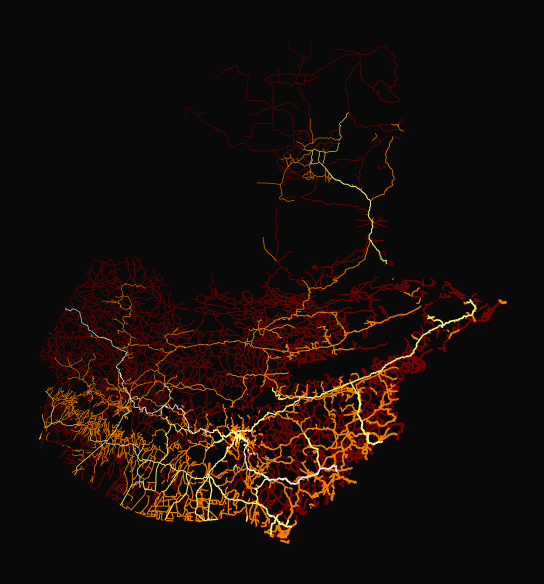

In [31]:
fig, ax = plt.subplots(facecolor="#090909")

roads.plot(ax=ax, column="GP_RTP", cmap="afmhot_r", lw=roads["distance2capital_lw"])
ax.axis("off")

plt.show()